# Notes on NumPy
Is a library that adds support for array, matrix, and tensor operations to Python.

A tensor in NumPy is defined by three attributes:
1. Rank - number of axes. (ndim)
2. Shape - describes how many dimensions the tensor has along each axis. (shape)
3. Data type - (dtype)

NumPy is a wrapper around a Basic Linear Algebra Subprograms (BLAS) library which are low-level, highly parallel, efficient tensor-manipulation routines typically implemented in Fortran or C.

####  Scalars (0D tensors)

In [13]:
import numpy as np

x = np.array(12)
print(x.ndim, x.shape, x.dtype)

0 () int64


#### Vectors (1D tensors)
A vector of 4 dimensions is a tensor of rank 1.

In [14]:
x = np.array([12, 3, 6, 14])
print(x.ndim, x.shape, x.dtype)

1 (4,) int64


#### Matrices (2D tensors)

In [15]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
print(x.ndim, x.shape, x.dtype)

2 (3, 5) int64


Using the MNIST dataset from Keras, we can look at the train_images tensor...

In [16]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim, train_images.shape, train_images.dtype)

3 (60000, 28, 28) uint8


Display the fourth digit...

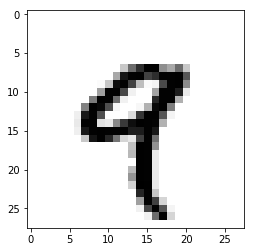

In [17]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating Tensors
Slicing allows you to select any range of data between two indices -- half-open range \[begin, end+1).

In [18]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [19]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [20]:
my_slice = train_images[10:100, 7:-7, 7:-7]
print(my_slice.shape)

(90, 14, 14)


### Tensor Operations

e.g. 

        output = relu(dot(W, input)+b)
        relu = max(x, 0)


In [21]:
def naive_relu(x):
    assert(len(x.shape) ==2)
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

In [22]:
x = np.array([[-1, 0, 1],
            [-2,-1, 0],
            [0, 1, 2]])
x1 = naive_relu(x)
print(x1)

x2 = np.maximum(x,0)
print(x2)

[[0 0 1]
 [0 0 0]
 [0 1 2]]
[[0 0 1]
 [0 0 0]
 [0 1 2]]


In [23]:
def naive_add(x, y):
    assert(len(x.shape) == 2)
    assert(x.shape == y.shape)
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [24]:
y = np.array([[1,0,0],
             [0, 1, 0],
             [0, 0,1]])

z1 = naive_add(x,y)
print(z1)

z2 = x + y
print(z2)

[[ 0  0  1]
 [-2  0  0]
 [ 0  1  3]]
[[ 0  0  1]
 [-2  0  0]
 [ 0  1  3]]


### Broadcasting
Broadcasting is a process of matching the shape of a tensor to match those of a higher rank tensor when there is no ambiguity. Broadcating consists of two steps:
1. Axes (broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
2. The smaller tensor is replicated alongside these new axes to match the shape of the larer tensor.

In [30]:
x = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9],
             [10, 11, 12]])
print("x:", x.ndim, x.shape)

y = np.array([10, 20, 30])
print("y:", y.ndim, y.shape)

print(np.maximum(x, y))
print(x + y)

x: 2 (4, 3)
y: 1 (3,)
[[10 20 30]
 [10 20 30]
 [10 20 30]
 [10 20 30]]
[[11 22 33]
 [14 25 36]
 [17 28 39]
 [20 31 42]]


In this case, we add an empty axis to y, whose shape becomes (1,3), and then (virtually) replicate y 4 times along this new axis to end up with a new y with shape (4,3). 

In [33]:
def naive_add_matrix_and_vector(x, y):
    assert(len(x.shape) == 2)
    assert(len(y.shape) == 1)
    assert(x.shape[1] == y.shape[0])
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [34]:
print(naive_add_matrix_and_vector(x,y))

[[11 22 33]
 [14 25 36]
 [17 28 39]
 [20 31 42]]


### Dot Product

In [35]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [37]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])

print(naive_vector_dot(x, y))
print(np.dot(x, y))

10
10


In [39]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:], y)
    return z

In [40]:
x = np.array([[1, 2, 3],
             [2, 1, 3],
             [3, 2, 1]])
y = np.array([2, 2, 2])

print(naive_matrix_vector_dot(x, y))
print(np.dot(x, y))

[12. 12. 12.]
[12 12 12]


In [47]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            col_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x, col_y)
    return z

In [49]:
x = np.array([[1, 2, 3],
             [4, 5, 6]])
y = np.array([[1, 1],
             [2, 2],
             [3, 3]])

print(naive_matrix_dot(x, y))
print(np.dot(x, y))

[[14. 14.]
 [32. 32.]]
[[14 14]
 [32 32]]


### Tensor Reshaping

In [50]:
x = np.array([[0, 1],
             [2, 3],
             [3, 4]])
print(x.shape)
print(x)

(3, 2)
[[0 1]
 [2 3]
 [3 4]]


In [52]:
x = x.reshape((6, 1))
print(x.shape)
print(x)

(6, 1)
[[0]
 [1]
 [2]
 [3]
 [3]
 [4]]


In [54]:
x = x.reshape((2,3))
print(x.shape)
print(x)

(2, 3)
[[0 1 2]
 [3 3 4]]


In [55]:
x = np.transpose(x)
print(x.shape)
print(x)

(3, 2)
[[0 3]
 [1 3]
 [2 4]]
